In [1]:
import io, time, json
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sklearn
from tensorflow.keras.utils import to_categorical
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
# Grabbing the nominees to get latest years data
def retrieve_html(url):
    """
    Return the raw HTML at the specified URL.

    Args:
        url (string): 

    Returns:
        result: dict, movie name as key, movie information as value
    """
    # remember to use browser header here, or cannot retrieve full data from the website
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    response = requests.get(url, headers = headers)
    html = response.content
    soup = BeautifulSoup(html,'lxml')

    result = {}
    for item in soup.find_all('div', {'class':'result-subgroup subgroup-awardcategory-chron'}):
        try:
            award_title = item.find('div',{'class':'result-subgroup-title'}).find('a',{'class':'nominations-link'}).contents[0]
            if award_title == 'ACTOR IN A LEADING ROLE':
                sub_groups = item.find_all('div',{'class':'result-details awards-result-actingorsimilar'})
                for sub in sub_groups:
                    sub_result = {}
                    film_title = sub.find('div',{'class':'awards-result-film-title'}).find('a',{'class':'nominations-link'}).contents[0]
                    is_winner = 1
                    actor = sub.find('div',{'class':'awards-result-nominationstatement'}).find('a',{'class':'nominations-link'}).contents[0]           
                    sub_result['film_title'] = film_title
                    sub_result['is_winner'] = is_winner
                    sub_result['actor'] = actor
                    result[film_title] = sub_result
        except Exception:
            pass
    return result

In [3]:
# data of year 2016
best_2016 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:89,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

# data of year 2017
best_2017 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:90,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

# data of year 2018
best_2018 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:91,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')
#best_2016

In [4]:
# Load Data
import numpy as np
import pandas as pd
# read from award
df_awards = pd.read_csv('database.csv', skiprows = 1, names=['year','ceremony','award','winner','name','film'])
df_movies = pd.read_csv('movies.csv')
df_credits = pd.read_csv('credits.csv')

In [5]:
# Testing
# Get list of awards to make sure we include all the right ones
df_awards.award.unique()

array(['Actor', 'Actress', 'Art Direction', 'Cinematography',
       'Directing (Comedy Picture)', 'Directing (Dramatic Picture)',
       'Engineering Effects', 'Outstanding Picture',
       'Unique and Artistic Picture', 'Writing (Adaptation)',
       'Writing (Original Story)', 'Writing (Title Writing)',
       'Special Award', 'Directing', 'Writing', 'Outstanding Production',
       'Sound Recording', 'Short Subject (Cartoon)',
       'Short Subject (Comedy)', 'Short Subject (Novelty)',
       'Assistant Director', 'Film Editing', 'Music (Scoring)',
       'Music (Song)', 'Dance Direction', 'Writing (Screenplay)',
       'Actor in a Supporting Role', 'Actress in a Supporting Role',
       'Short Subject (Color)', 'Short Subject (One Reel)',
       'Short Subject (Two Reel)', 'Irving G. Thalberg Memorial Award',
       'Music (Original Score)', 'Cinematography (Black and White)',
       'Cinematography (Color)', 'Special Effects',
       'Art Direction (Black and White)', 'Art Direct

In [6]:
#View data
print(df_awards.head())
print("-------------")
print(df_movies.head())
print("-------------")
print(df_credits.head())

   year  ceremony    award  winner                 name              film
0  1928         1    Actor     NaN  Richard Barthelmess         The Noose
1  1928         1    Actor     1.0        Emil Jannings  The Last Command
2  1928         1  Actress     NaN       Louise Dresser   A Ship Comes In
3  1928         1  Actress     1.0         Janet Gaynor        7th Heaven
4  1928         1  Actress     NaN       Gloria Swanson    Sadie Thompson
-------------
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.c

In [7]:
# append the data we scrapped to the df_awards
data=[]
for k,v in best_2016.items():
    row = []
    row.append(['2016', 89, 'Actor in a Leading Role', v['is_winner'], v['actor'], v['film_title']])
    data.append(row[0])

for k,v in best_2017.items():
    row = []
    row.append(['2017', 90, 'Actor in a Leading Role', v['is_winner'], v['actor'], v['film_title']])
    data.append(row[0])

for k,v in best_2018.items():
    row = []
    row.append(['2018', 91, 'Actor in a Leading Role', v['is_winner'], v['actor'], v['film_title']])
    data.append(row[0])

# pass the column name to the columns!!! Or there will be a runtime error
df_awards=df_awards.append(pd.DataFrame(data,columns=['year','ceremony','award','winner','name','film']),ignore_index=True)

df_awards

,year,ceremony,award,winner,name,film
0,1928,1,Actor,NaN,Richard Barthelmess,The Noose
1,1928,1,Actor,1.0,Emil Jannings,The Last Command
2,1928,1,Actress,NaN,Louise Dresser,A Ship Comes In
3,1928,1,Actress,1.0,Janet Gaynor,7th Heaven
4,1928,1,Actress,NaN,Gloria Swanson,Sadie Thompson
5,1928,1,Art Direction,NaN,Rochus Gliese,Sunrise
6,1928,1,Art Direction,1.0,William Cameron Menzies,The Dove; Tempest
7,1928,1,Art Direction,NaN,Harry Oliver,7th Heaven
8,1928,1,Cinematography,NaN,George Barnes,The Devil Dancer; The Magic Flame; Sadie Thompson
9,1928,1,Cinematography,1.0,Charles Rosher,Sunrise


In [8]:
# Data Manipulation
#Joining the credits and movies dataframes
if 'title' in df_credits.columns: 
  df_credits = df_credits.drop('title',axis=1) 
df_credits_movies = df_credits.set_index('movie_id').join(df_movies.set_index('id'))

df_credits_movies.columns

Index(['cast', 'crew', 'budget', 'genres', 'homepage', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [9]:
#df_credits_movies.dtypes
# Reset the data types and get the earliest date of release_date
df_credits_movies['release_date'] = pd.to_datetime(df_credits_movies['release_date'])
#get the earliest release date from the dataset
min_year = min(df_credits_movies['release_date']) #1916-09-04
max_year = max(df_credits_movies['release_date']) #2017-02-03

In [10]:
# Select movies that are in 'Actor', 'Actor in a Leading Role' awards category -> df_picture_awards
#join df_credits_movies and df_awards by movie name (df_credits_movies.title = df_awards.movieName)
#before that, extract Directing from the df_awards
df_picture_awards = df_awards.loc[df_awards['award'].isin(['Actor', 'Actor in a Leading Role'])]
df_picture_awards.reset_index(drop = True, inplace = True)
df_credits_movies = df_credits_movies.loc[df_credits_movies['status'].isin(['Released'])]

print("--------------")
print(df_picture_awards.columns)
print("--------------")
print(df_credits_movies.columns)

--------------
Index(['year', 'ceremony', 'award', 'winner', 'name', 'film'], dtype='object')
--------------
Index(['cast', 'crew', 'budget', 'genres', 'homepage', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')


In [11]:
# Replace all the null value in ‘winner’ column with 1
# df_picture_awards['winner'].isnull().sum()
df_picture_awards['winner'].fillna(1,inplace = True)
df_picture_awards

,year,ceremony,award,winner,name,film
0,1928,1,Actor,1.0,Richard Barthelmess,The Noose
1,1928,1,Actor,1.0,Emil Jannings,The Last Command
2,1929,2,Actor,1.0,George Bancroft,Thunderbolt
3,1929,2,Actor,1.0,Warner Baxter,In Old Arizona
4,1929,2,Actor,1.0,Chester Morris,Alibi
5,1929,2,Actor,1.0,Paul Muni,The Valiant
6,1929,2,Actor,1.0,Lewis Stone,The Patriot
7,1930,3,Actor,1.0,George Arliss,Disraeli
8,1930,3,Actor,1.0,George Arliss,The Green Goddess
9,1930,3,Actor,1.0,Wallace Beery,The Big House


In [12]:
# join df_picture_awards with df_credits_movies
#cleaning names/punctuation
import re
movieName = [re.sub(r'[^\w\s]','',x) for x in df_picture_awards['film'].str.lower().str.strip().values]
title = [re.sub(r'[^\w\s]','',x) for x in df_credits_movies['title'].str.lower().str.strip().values]
#then, change the title in the movie to lower case
df_picture_awards.loc[:,'movie_title'] = movieName #change the string to lower case
df_credits_movies.loc[:,'movie_title']= title
# check the dataframe, we can see the string in movie_title now is valid
print(df_picture_awards.head())

   year  ceremony  award  winner                 name              film  \
0  1928         1  Actor     1.0  Richard Barthelmess         The Noose   
1  1928         1  Actor     1.0        Emil Jannings  The Last Command   
2  1929         2  Actor     1.0      George Bancroft       Thunderbolt   
3  1929         2  Actor     1.0        Warner Baxter    In Old Arizona   
4  1929         2  Actor     1.0       Chester Morris             Alibi   

        movie_title  
0         the noose  
1  the last command  
2       thunderbolt  
3    in old arizona  
4             alibi  


In [13]:
# join the two tables, merge the data
df = df_picture_awards.merge(df_credits_movies, left_on='movie_title', right_on='movie_title', how='right')
df = df.reset_index(drop=True)
#drop the columns from award table
df.drop('homepage',axis = 1, inplace = True)
df.drop('year',axis = 1, inplace = True)
df.drop('award',axis = 1, inplace = True)
#df.drop('name',axis = 1, inplace = True)
df.drop('film',axis = 1, inplace = True)
df.drop('ceremony',axis = 1, inplace = True)
df['winner'].fillna(0,inplace=True) #fill NA with 0
df

,winner,name,movie_title,cast,crew,budget,genres,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,1.0,Lewis Stone,the patriot,"[{""cast_id"": 12, ""character"": ""Benjamin Martin...","[{""credit_id"": ""52fe432dc3a36847f80404b5"", ""de...",110000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...","[{""id"": 526, ""name"": ""rebel""}, {""id"": 531, ""na...",en,The Patriot,...,"[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2000-06-28,215294342,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some things are worth fighting for.,The Patriot,6.8,1099
1,1.0,Adolphe Menjou,the front page,"[{""cast_id"": 15, ""character"": ""Hildebrand John...","[{""credit_id"": ""52fe4296c3a36847f802a741"", ""de...",4000000,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 18, ...","[{""id"": 520, ""name"": ""chicago""}, {""id"": 736, ""...",en,The Front Page,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1974-12-01,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Front Page,6.9,68
2,1.0,Clark Gable,it happened one night,"[{""cast_id"": 10, ""character"": ""Peter Warne"", ""...","[{""credit_id"": ""52fe4383c3a36847f8059c33"", ""de...",325000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...","[{""id"": 416, ""name"": ""miami""}, {""id"": 11184, ""...",en,It Happened One Night,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1934-02-22,4500000,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,TOGETHER... for the first time,It Happened One Night,7.7,275
3,1.0,Clark Gable,gone with the wind,"[{""cast_id"": 10, ""character"": ""Scarlett O'Hara...","[{""credit_id"": ""52fe4274c3a36847f801fe01"", ""de...",4000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 314, ""name"": ""life and death""}, {""id"":...",en,Gone with the Wind,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1939-12-15,400176459,238.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The greatest romance of all time!,Gone with the Wind,7.7,970
4,1.0,Laurence Olivier,wuthering heights,"[{""cast_id"": 4, ""character"": ""Heathcliff"", ""cr...","[{""credit_id"": ""52fe45f79251416c910448eb"", ""de...",0,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 187056, ""name"": ""woman director""}]",en,Wuthering Heights,...,[],2009-01-18,0,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Wuthering Heights,6.9,37
5,1.0,James Stewart,mr smith goes to washington,"[{""cast_id"": 9, ""character"": ""Jefferson Smith""...","[{""credit_id"": ""52fe4383c3a36847f8059f93"", ""de...",1500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 417, ""name"": ""corruption""}, {""id"": 521...",en,Mr. Smith Goes to Washington,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1939-10-19,9600000,129.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Romance, drama, laughter and heartbreak... cre...",Mr. Smith Goes to Washington,7.9,241
6,1.0,Laurence Olivier,rebecca,"[{""cast_id"": 10, ""character"": ""'Maxim' de Wint...","[{""credit_id"": ""56520a6d9251414af900b1b8"", ""de...",1288000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...","[{""id"": 660, ""name"": ""monte carlo""}, {""id"": 81...",en,Rebecca,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1940-04-12,6000000,130.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The shadow of this woman darkened their love.,Rebecca,7.7,336
7,1.0,Humphrey Bogart,casablanca,"[{""cast_id"": 2, ""character"": ""Rick Blaine"", ""c...","[{""credit_id"": ""52fe4233c3a36847f800b88f"", ""de...",878000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 128, ""name"": ""love triangle""}, {""id"": ...",en,Casablanca,...,"[{""iso_3166_1"": ""US"", ""name"": ""United State

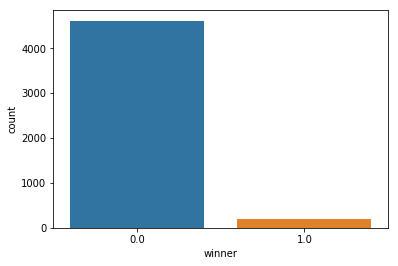

In [14]:
# We will choose the under-sampling by sampling from the 0-labeled data. 
# We need to first get a subset of nominated data, then sample from the non-nominated data, 
# and finally append the sampled data to the subset of nominated data.
sns.countplot(x='winner', data = df)


In [15]:
#Get the number of 0 labeled data, and the number of 1 labeled data
print(len(df.loc[df['winner'] == 0])) #4613
print(len(df.loc[df['winner'] == 1])) #189

4613
189


In [16]:
#balance the data
df_subset_0 = df.loc[df['winner'] == 0]
df_subset_1 = df.loc[df['winner'] == 1]

df_subset_0.drop('winner',axis=1,inplace=True)
df_subset_1.drop('winner',axis=1,inplace=True)

#sample with replacement
df_subset_0 = df_subset_0.sample(400) 
df_subset = pd.concat([df_subset_0,df_subset_1],ignore_index = True)
df_new = df_subset.merge(df_picture_awards, left_on = 'movie_title', right_on = 'movie_title', how = 'left')
df_new = df_new.fillna(0)

In [17]:
print(len(df_new))

603


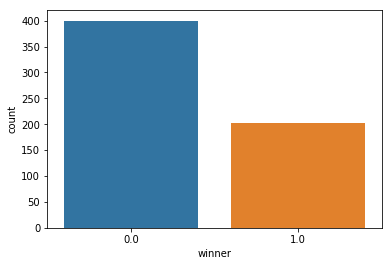

In [18]:
sns.countplot(x='winner', data = df_new)

In [19]:
#check number of null values in the dataset
df_new.isnull().sum()

name_x                  0
movie_title             0
cast                    0
crew                    0
budget                  0
genres                  0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
year                    0
ceremony                0
award                   0
winner                  0
name_y                  0
film                    0
dtype: int64

In [20]:
#Exploratory Data Analysis

# check the data types and select numeric variables
df_new.dtypes

name_x                          object
movie_title                     object
cast                            object
crew                            object
budget                           int64
genres                          object
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
year                             int64
ceremony                       float64
award                           object
winner                   

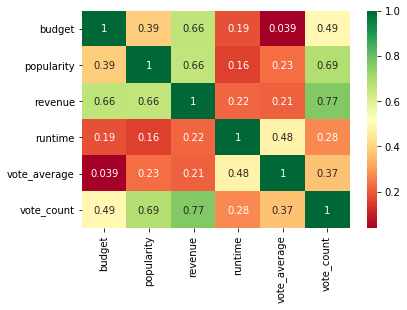

In [21]:
# correlation analysis
g = sns.heatmap(df_new[['budget','popularity','revenue','runtime','vote_average','vote_count']].corr(),cmap='RdYlGn',annot=True)

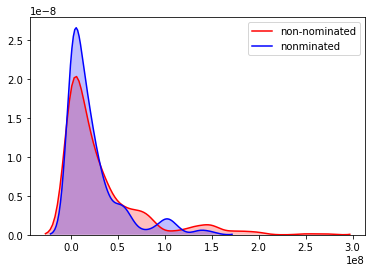

In [22]:
# Density Curve
# budget
budget0 = df_new[df_new['winner'] == 0]['budget']
budget1 = df_new[df_new['winner'] == 1]['budget']

g = sns.kdeplot(budget0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(budget1, legend = True, shade=True, color='b', label = 'nonminated')

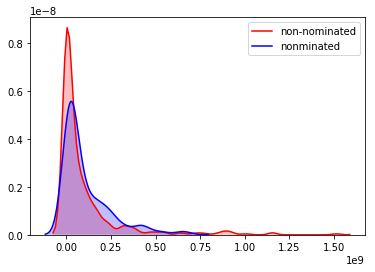

In [23]:
# revenue
# density curve
revenue0 = df_new[df_new['winner'] == 0]['revenue']
revenue1 = df_new[df_new['winner'] == 1]['revenue']

g = sns.kdeplot(revenue0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(revenue1, legend = True, shade=True, color='b', label = 'nonminated')

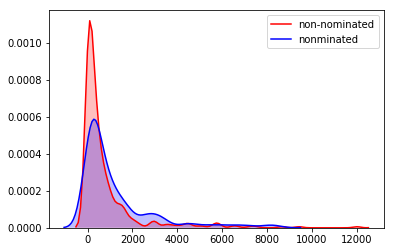

In [24]:
# vote count
vc0 = df_new[df_new['winner'] == 0]['vote_count']
vc1 = df_new[df_new['winner'] == 1]['vote_count']

g = sns.kdeplot(vc0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(vc1, legend = True, shade=True, color='b', label = 'nonminated')

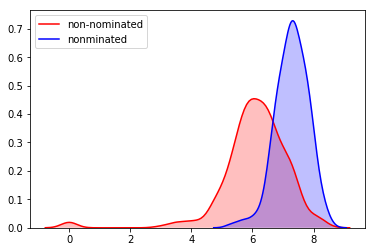

In [25]:
# vote average
va0 = df_new[df_new['winner'] == 0]['vote_average']
va1 = df_new[df_new['winner'] == 1]['vote_average']

g = sns.kdeplot(va0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(va1, legend = True, shade=True, color='b', label = 'nonminated')

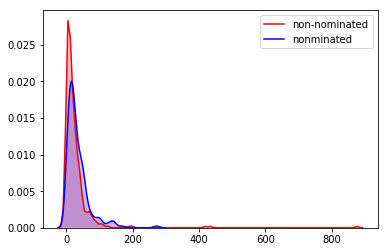

In [26]:
# popularity
popularity0 = df_new[df_new['winner'] == 0]['popularity']
popularity1 = df_new[df_new['winner'] == 1]['popularity']

g = sns.kdeplot(popularity0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(popularity1, legend = True, shade=True, color='b', label = 'nonminated')

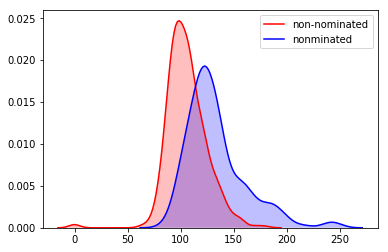

In [27]:
#runtime
runtime0 = df_new[df_new['winner'] == 0]['runtime']
runtime1 = df_new[df_new['winner'] == 1]['runtime']

g = sns.kdeplot(runtime0, legend = True, shade=True, color='r', label = 'non-nominated')
g = sns.kdeplot(runtime1, legend = True, shade=True, color='b', label = 'nonminated')

In [28]:
#genres
#clean the data
genres_name0 = {}
genres_name1 = {}
genres_set = set()
for i in range(len(df_new)):
    genres = json.loads(df_new.loc[i,'genres'])
    for it in genres:
        genres_set.add(it['name'])
        if df_new.loc[i,'winner'] == 0:
            if it['name'] not in genres_name0:
                genres_name0[it['name']] = 1
            else:
                genres_name0[it['name']] += 1
        if df_new.loc[i,'winner'] == 1:
            if it['name'] not in genres_name1:
                genres_name1[it['name']] = 1
            else:
                genres_name1[it['name']] += 1

genres_array0=[]
genres_array1=[]
for g in genres_set:
    if g in genres_name0:
        genres_array0.append(genres_name0[g])
    else:
        genres_array0.append(0)
    if g in genres_name1:
        genres_array1.append(genres_name1[g])
    else:
        genres_array1.append(0)


        
genres_all = []
genres_all.append(np.array(genres_array0)/sum(genres_array0))
genres_all.append(np.array(genres_array1)/sum(genres_array1))

In [29]:
df_genres = pd.DataFrame(genres_all, columns=list(genres_set))
print(df_genres.head())

   Documentary    Family    Comedy    Action  Adventure   Romance   Western  \
0     0.005676  0.053926  0.134342  0.098392   0.076632  0.056764  0.004730   
1     0.000000  0.011161  0.055804  0.031250   0.031250  0.109375  0.020089   

      Crime       War     Drama  Science Fiction   Foreign   Mystery  \
0  0.060549  0.009461  0.173132         0.047304  0.001892  0.032167   
1  0.053571  0.060268  0.421875         0.006696  0.000000  0.015625   

      Music    Horror   Fantasy  Thriller   History  Animation  
0  0.012299  0.041627  0.039735  0.107852  0.016083   0.027436  
1  0.031250  0.002232  0.008929  0.049107  0.091518   0.000000  


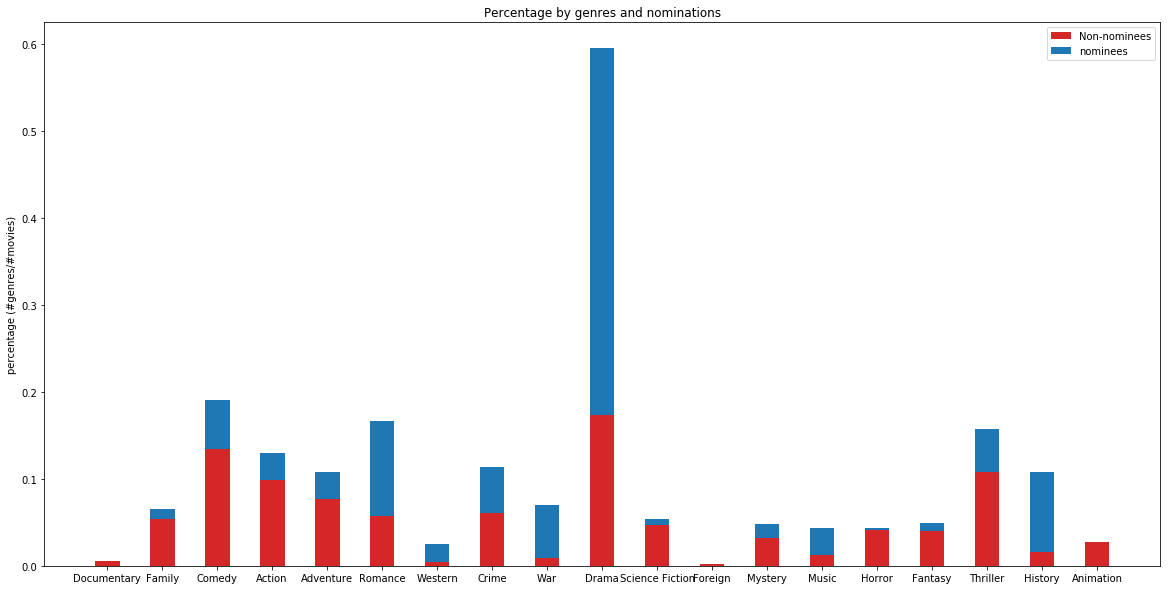

In [30]:
# draw stacked bar chart
N = len(df_genres.columns)
ind = np.arange(N)
width = 0.45

plt.figure(figsize=(20,10))
p1 = plt.bar(ind, df_genres.loc[[0]].values[0], width, color='#d62728')
p2 = plt.bar(ind, df_genres.loc[[1]].values[0], width, bottom=df_genres.loc[[0]].values[0])


plt.ylabel('percentage (#genres/#movies)')
plt.title('Percentage by genres and nominations')
plt.xticks(ind,df_genres.columns)
plt.legend((p1[0],p2[0]),('Non-nominees','nominees'))

In [31]:
# Feature Engineering
# Since many columns such as “crew”, “cast” contain information in json format, we need to extract useful information from the columns and then perform one hot encoding.
# We will transform our dataset into a all numeric matrix so that we can feed the data into our machine learning model.
# To look at the structure of column (eg.”cast”), we can use: df.loc[0,’cast’]
import json
def feature_engineering(column_name, df, json_name):
    """
    Args:
        column_name: the column name in the dataframe that contains a json file that needs to conduct feature engineering on
        df: dataframe that perform feature engineering on
        json_name: name in the json file that we want to extract
    
    Returns: new dataframe after feature engineering
    """
    
    name = {}

    for item in df[column_name]:
        group = json.loads(item)
        for it in group:
            if it[json_name] not in name:
                name[it[json_name]] = 1
            else:
                name[it[json_name]] += 1
    
    final = {}
    index = 0
    for k,v in name.items():
        if v > 1:
            final[k] = index
            index += 1
    np_item = np.zeros((len(df),len(final)))
    item_dict = {}
    row = 0
    for item in df[column_name]:
        group = json.loads(item)
        for it in group:
            if it[json_name] in final:
                index = final[it[json_name]]
                np_item[row][index] = 1
        row += 1

    df_item = pd.DataFrame(np_item, columns = list(final.keys()))
    df_output = pd.concat([df,df_item],axis = 1)
    
    return df_output

In [32]:
df2 = feature_engineering("cast", df_new, "name")
df2 = df2.drop('cast', axis = 1) #drop the column after feature engineering

In [33]:
# director
crew_name = {}

for item in df2['crew']:
    crew = json.loads(item)
    for it in crew:
        if it['job'] == 'Director':
            if it['name'] not in crew_name:
                crew_name[it['name']] = 1
            else:
                crew_name[it['name']]+=1


# set the appear tims for actors
final_crew = {}
index = 0
for k,v in crew_name.items():
    if v > 0:
        final_crew[k] = index
        index += 1
# print(len(final_crew))

np_crew = np.zeros((len(df2), len(final_crew)))
row = 0
for item in df2['crew']:
    crew = json.loads(item)
    for it in crew:
        if it['job'] == 'Director':
            if it['name'] in final_crew:
                index = final_crew[it['name']]
                np_crew[row][index] = 1
    row += 1

df_crew = pd.DataFrame(np_crew, columns = list(final_crew.keys()))
            
df3 = pd.concat([df2, df_crew], axis = 1)
# print(df.shape)

In [34]:
df3=df3.drop(['crew'],axis=1)
#genres
df4 = feature_engineering("genres", df3, "name")
df4 = df4.drop(['genres'], axis = 1)
#keywords
df5 = feature_engineering('keywords', df4, 'name')
df5 = df5.drop(['keywords'], axis = 1)
#production_companies
df6 = feature_engineering('production_companies',df5,'name')
df6 = df6.drop(['production_companies'],axis=1)
#production_countries
df7 = feature_engineering('production_countries',df6,'name')
df7 = df7.drop(['production_countries'],axis=1)
#spoken_languages
df8 = feature_engineering('spoken_languages',df7,'iso_639_1')
df8 = df8.drop(['spoken_languages'],axis=1)


In [35]:
df8

,name_x,movie_title,budget,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,ur,ko,cn,no,sr,hr,pa,tr,fa,ga
0,0,mad max fury road,150000000,en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,2015-05-13,378858340,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,where the truth lies,25000000,en,Where the Truth Lies,An ambitious reporter probes the reasons behin...,4.051221,2005-10-07,0,107.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,big fat liar,15000000,en,Big Fat Liar,Fourteen-year-old Jason Shepherd (Muniz) has a...,9.125594,2002-02-08,52970014,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,resident evil retribution,65000000,en,Resident Evil: Retribution,The Umbrella Corporation’s deadly T-virus cont...,6.227675,2012-09-12,240159255,95.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,thumbsucker,0,en,Thumbsucker,"Justin, a teenager boy, throws himself and eve...",4.757625,2005-01-23,1919197,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,the country doctor,0,fr,Médecin de campagne,"All the people in this countryside area, can c...",2.651304,2016-03-23,0,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,memoirs of a geisha,85000000,en,Memoirs of a Geisha,A sweeping romantic epic set in Japan in the y...,16.595874,2005-12-06,162242962,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,running forever,0,en,Running Forever,After being estranged since her mother's death...,0.028756,2015-10-27,0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,the dictator,65000000,en,The Dictator,The heroic story of a dictator who risks his l...,31.349143,2012-05-15,179379533,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,the santa clause 2,65000000,en,The Santa Clause 2,Better watch out! The big guy in red is coming...,14.646884,2002-10-31,172855065,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# drop the columns not used
df_clean = df8.drop(["film","name_y","name_x","overview","original_title","original_language","tagline","status","release_date","award"],axis=1)

In [37]:
df_clean

,movie_title,budget,popularity,revenue,runtime,title,vote_average,vote_count,year,ceremony,...,ur,ko,cn,no,sr,hr,pa,tr,fa,ga
0,mad max fury road,150000000,434.278564,378858340,120.0,Mad Max: Fury Road,7.2,9427,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,where the truth lies,25000000,4.051221,0,107.0,Where the Truth Lies,5.9,66,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,big fat liar,15000000,9.125594,52970014,88.0,Big Fat Liar,5.6,197,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,resident evil retribution,65000000,6.227675,240159255,95.0,Resident Evil: Retribution,5.6,1600,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,thumbsucker,0,4.757625,1919197,96.0,Thumbsucker,6.1,67,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,the country doctor,0,2.651304,0,102.0,The Country Doctor,6.0,63,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,memoirs of a geisha,85000000,16.595874,162242962,145.0,Memoirs of a Geisha,7.3,652,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,running forever,0,0.028756,0,88.0,Running Forever,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,the dictator,65000000,31.349143,179379533,83.0,The Dictator,5.9,1743,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,the santa clause 2,65000000,14.646884,172855065,104.0,The Santa Clause 2,5.5,297,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Model Training
# split
X = df_clean[df_clean.columns.difference(['winner'])]
# X = StandardScaler().fit_transform(X)
y = df_clean['winner']
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5.0, random_state=0)

In [39]:
#test: ValueError: could not convert string to float: 'devil'
# how is there 'devil' if i'm getting the info from the 'winner' column?
#df_clean['winner'].values -- nothing but 0s and 1s
#X_train.columns.tolist() #looks like it...

In [40]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
fit = pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
# pca = PCA(n_components = 3)
# fit = pca.fit_transform(X)
# fit2 = pca.fit(X)
# print("Explained Variance: %s" % pca.explained_variance_ratio_) 
# print(fit)

ValueError: could not convert string to float: 'identity thief'

In [ ]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# For small datasets, ‘liblinear’ is a good choice
logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(X_train, y_train)

In [ ]:
# Predict for One Observation
predicted = logisticRegr.predict(X_test)
print(logisticRegr.predict(X_test))
print(y_test.index)
# df8['movie_title'][y_test.index]

In [ ]:
logisticRegr.score(X_test, y_test) # 0.6528925619834711

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
sensitivity = tp/(tp+fn)
print(sensitivity) # 0.358974358974359

In [ ]:
# Improvement: Cross Validation
# 3-fold Cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
sumAccuracy = []
for train,test in skf.split(X,y):
#     logisticRegr.fit(df_clean.iloc[train][], )
    df_train = df_clean.iloc[train]
    df_test = df_clean.iloc[test]
    train_X = df_train[df_clean.columns.difference(['winner'])]
    train_y = df_train['winner']
    test_X = df_test[df_clean.columns.difference(['winner'])]
    test_y = df_test['winner']
    logisticRegr.fit(train_X, train_y)
    sumAccuracy.append(logisticRegr.score(test_X, test_y))
avg = np.mean(sumAccuracy)
print(avg) # 0.7803837953091683
#     print(df_clean.iloc[train,df_clean.columns.difference(['winner'])])